# Análise dos Pares
Após identificar os pares em Cointegration.ipynb, é hora de analisar quais os melhores estão sinalizando entrada

https://wtrust.com.br/Quanttools/

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
%run Cointegration.py

# Funtions

In [20]:
def plot_last_days(data, y_symbol, x_symbol):
    index = len(data)-8
    fig2, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 13))
    for i, ax in enumerate(axes.flatten()):
        index+=1
        last_data = data.iloc[:index].copy()
        label = last_data.index[-1]
        subshow(last_data, y_symbol, x_symbol, ax, title=label)

def plot_show(data, pairs):
    fig2, axes = plt.subplots(nrows=int((pairs.shape[0]/2)), ncols=2, figsize=(15, 30))
    for i, ax in enumerate(axes.flatten()):
        row = pairs.iloc[i]
        y_symbol = row['Dependente']
        x_symbol = row['Independente']

        subshow(data, y_symbol, x_symbol, ax, title='{}/{} ({})'.format(y_symbol, x_symbol, i))
    
def subshow(data, y_symbol, x_symbol, ax, period=250, title=''):
    y, x = getvalues_by_period(data[y_symbol], data[x_symbol], period)
    model= model_ols(y, x)
    result = zscore(model.resid)
    std = result.std()
    result.plot(ax=ax)
    #ax.plot(result)
    if(title == ''):
        ax.set_title('{} / {}'.format(y_symbol, x_symbol))
    else:
        ax.set_title(title)
    ax.margins(0.1)
    ax.set_xlabel('')

    ax.axhline(0, color='black',label='mean')
    ax.axhline(2*std, color='red', linestyle='--', linewidth=2)
    ax.axhline(-2*std, color='green', linestyle='--', linewidth=2)

In [21]:
path_data_cart = 'datasets/data_cart.csv'

In [22]:
data = pd.read_csv(path_data_cart, index_col=0)
pairs = pd.read_csv('datasets/cointegrated_pairs.csv')

print('{} to {}'.format(data.index[0], data.index[-1]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

16/04/2019 to 30/06/2020
data: (300, 71)
pairs: (1065, 13)


Procura pares que estão quase no ponto de entrada 95% de distância da média e 5% próximo da zona -2 e +2

In [23]:
pairs_signal = pairs.loc[(pairs['Signal'] >= 0.95)].copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal.shape

(26, 13)

In [24]:
#signal2 = pd.read_csv('datasets/sinais/sinais_25062020.csv')

In [25]:
pairs_signal = pairs_signal.loc[(pairs_signal['PeriodQt'] > 2)].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CPFE3,ENGI11,0.000207,99,0.563579,5,0.235376,0.786675,1.129076,Long/Short,8,"120,140,160,180,200,220,240,250"
1,250,CYRE3,LREN3,0.021066,95,0.787068,6,0.291185,0.790920,1.141566,Short/Long,7,"140,160,180,200,220,240,250"
2,250,ENBR3,MRVE3,0.002401,99,0.667276,6,0.222375,0.628023,1.064586,Long/Short,6,"160,180,200,220,240,250"
3,250,LREN3,MULT3,0.035605,95,1.473282,6,0.315142,0.867912,1.031891,Short/Long,4,"160,200,240,250"
4,250,IGTA3,LREN3,0.027535,95,1.098162,7,0.298398,0.844108,1.037568,Long/Short,8,"120,140,160,180,200,220,240,250"
5,250,BRAP4,TAEE11,0.017233,95,2.057924,8,0.310037,0.490413,0.985626,Short/Long,6,"160,180,200,220,240,250"
6,250,RENT3,SBSP3,0.003484,99,0.836175,8,0.180557,0.595471,0.950691,Long/Short,9,"100,120,140,160,180,200,220,240,250"
7,250,B3SA3,SBSP3,0.039414,95,0.496452,9,0.243473,0.618145,1.423439,Short/Long,3,"220,240,250"
8,250,CYRE3,VIVT4,0.002756,99,1.343889,9,0.298444,0.492208,0.959084,Short/Long,6,"160,180,200,220,240,250"
9,250,ITSA4,PETR4,0.019965,95,0.346111,10,0.331202,0.656236,0.964837,Long/Short,3,"220,240,250"


In [26]:
#pairs_signal.to_csv('datasets/sinais/sinais_29062020.csv', index=False)

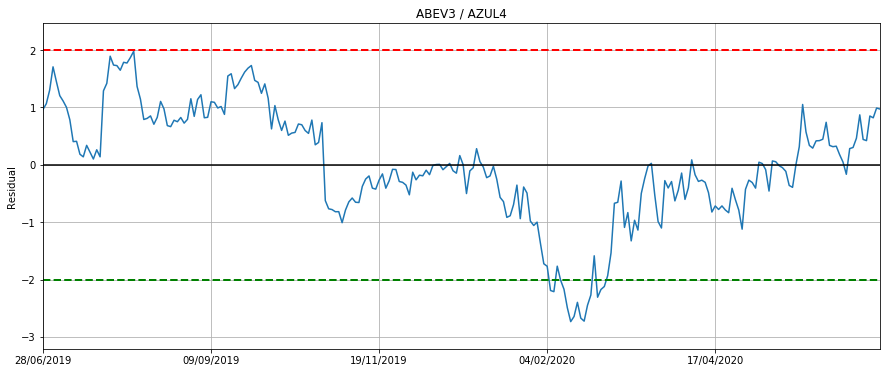

In [30]:
show(data, 'ABEV3', 'AZUL4')

### Plota todos os sinais

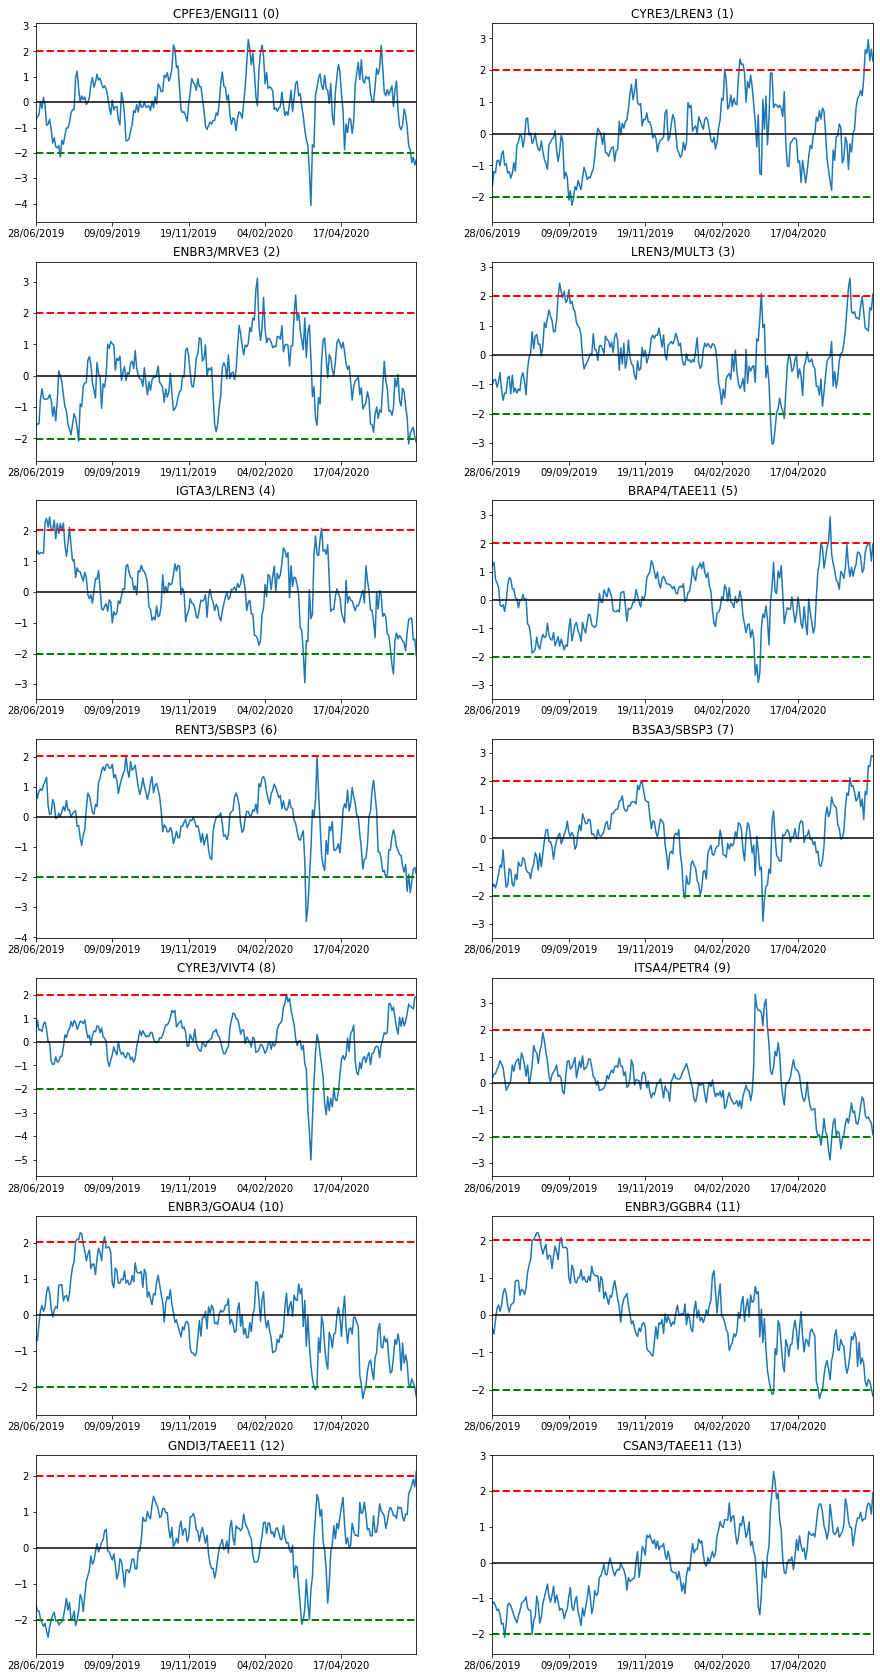

In [31]:
fig2, axes = plt.subplots(nrows=int((pairs_signal.shape[0]/2)), ncols=2, figsize=(15, 30))
for i, ax in enumerate(axes.flatten()):
    row = pairs_signal.iloc[i]
    y_symbol = row['Dependente']
    x_symbol = row['Independente']
    
    subshow(data, y_symbol, x_symbol, ax, title='{}/{} ({})'.format(y_symbol, x_symbol, i))
    #plt.tight_layout()

In [32]:
#pairs_signal.iloc[[0,1,2,6,9,11]].to_csv('datasets/oper/29062020.csv', index=False)

# Análise das operações abertas

In [33]:
operation = pd.read_csv('datasets/oper/29062020.csv')
operation

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CPFE3,ENGI11,0.000094,99,0.564880,5,0.226434,0.954111,1.110346,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CYRE3,LREN3,0.010324,95,0.791469,5,0.275411,0.963727,1.184884,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,B3SA3,BPAC11,0.041758,95,0.281372,8,0.339061,0.824582,0.988170,Short/Long,5,"100,200,220,240,250"
3,250,IGTA3,USIM5,0.040829,95,4.352774,9,0.288569,0.933737,1.531298,Long/Short,3,"220,240,250"
4,240,GNDI3,TAEE11,0.027070,95,4.600665,14,0.306884,0.751806,0.973784,Short/Long,6,"140,160,180,200,220,240"
5,180,MULT3,QUAL3,0.031236,95,0.757107,20,0.395499,0.823725,1.014372,Long/Short,3,"120,160,180"


In [34]:
#operation[['Dependente', 'Independente', 'SignalStr']]

In [35]:
"""excel = data[293:][['AZUL4', 'BBSE3']].copy()
excel = excel.iloc[::-1]
excel[0:10].to_excel('datasets/test.xlsx')"""

"excel = data[293:][['AZUL4', 'BBSE3']].copy()\nexcel = excel.iloc[::-1]\nexcel[0:10].to_excel('datasets/test.xlsx')"

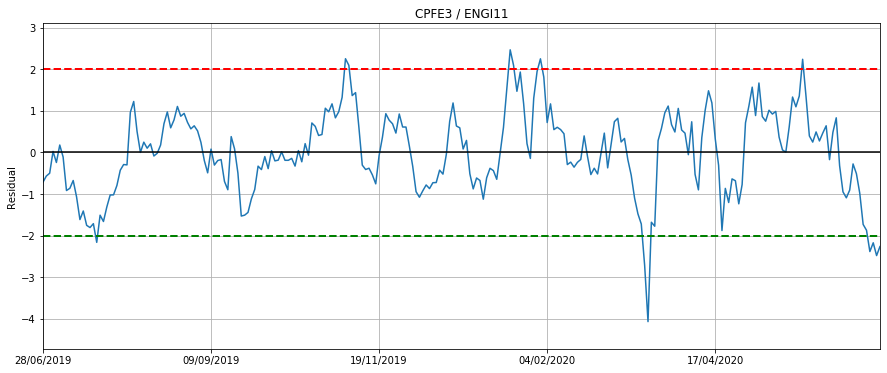

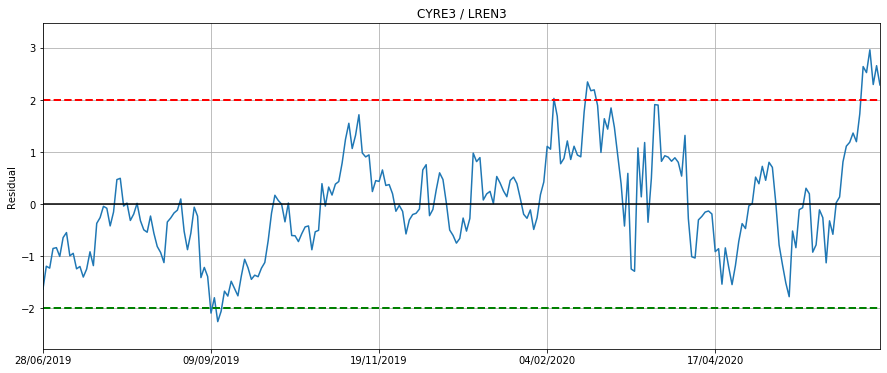

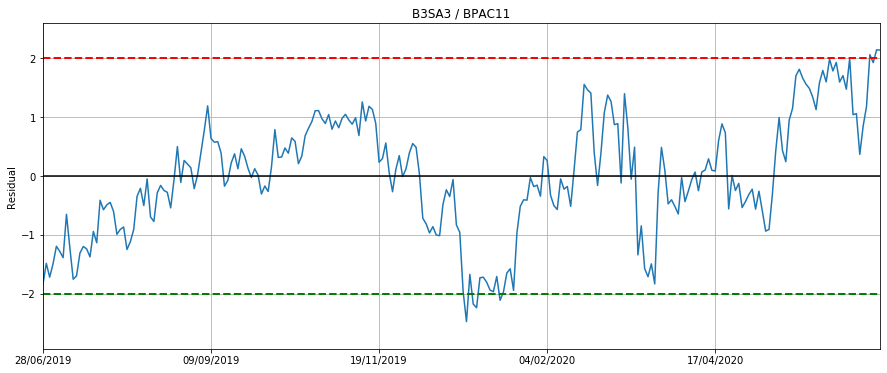

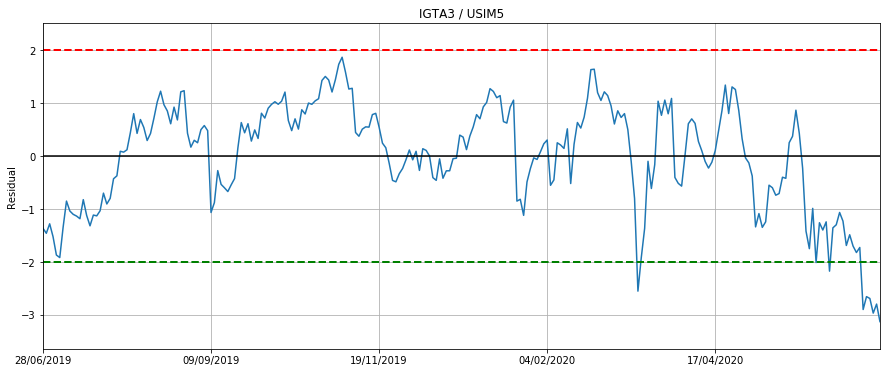

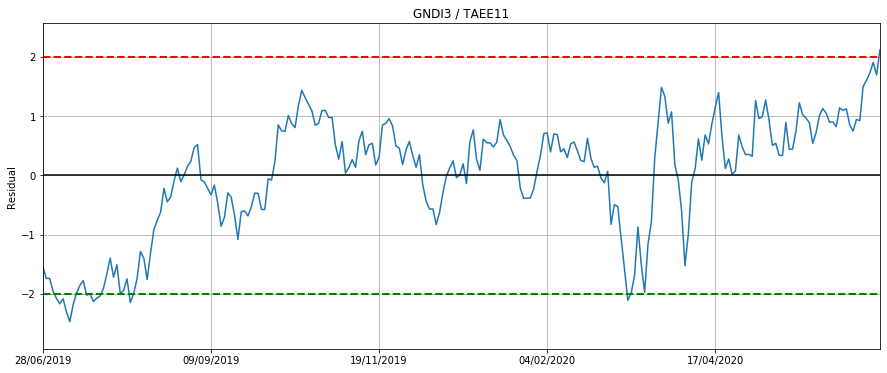

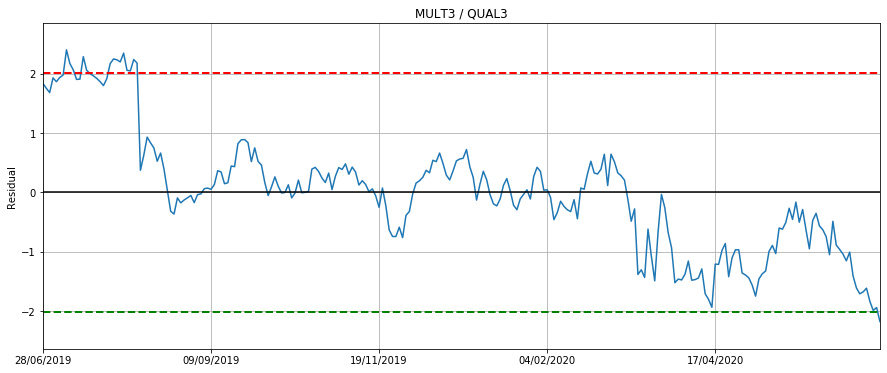

In [36]:
for i, row in operation.iterrows():
    y, x = getvalues_by_period(data[row['Dependente']], data[row['Independente']], row['Period'])
    row = operation.iloc[i]
    y_symbol = row['Dependente']
    x_symbol = row['Independente']
    show(data, y_symbol, x_symbol)

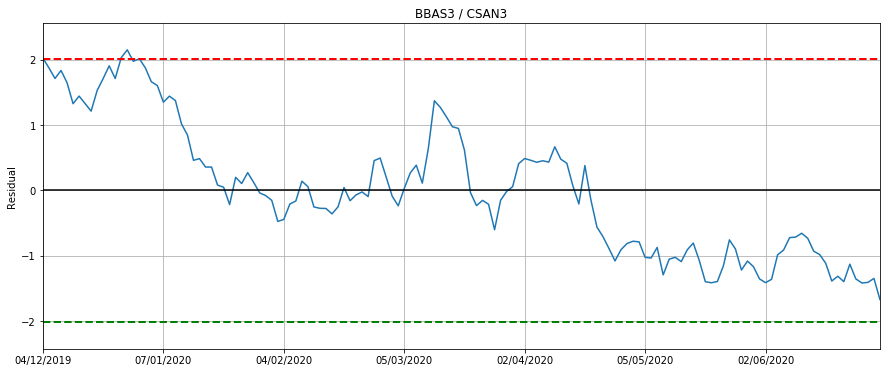

In [67]:
show(data, 'BBAS3', 'CSAN3', 140)